In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [33]:
df=pd.read_csv("/content/Sample - Superstore.csv", encoding='windows-1252')

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.head(6)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [36]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period('M')

In [37]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Year       0
Order Month      0
dtype: int64


In [38]:
# Step 1: Sales by region
top_region = df.groupby("Region")["Sales"].sum().idxmax()
top_region_value = df.groupby("Region")["Sales"].sum().max()

# Step 2: Most profitable category
top_category = df.groupby("Category")["Profit"].sum().idxmax()

# Step 3: Most sold sub-category
top_subcat = df.groupby("Sub-Category")["Sales"].sum().idxmax()

# Step 4: Avg profit for high discounts
high_discount = df[df["Discount"] > 0.3]
avg_profit_high_discount = high_discount["Profit"].mean()

In [13]:
# Step 5: Create text summary
knowledge_base = f"""
- The {top_region} region had the highest total sales at ${top_region_value:,.0f}.
- The most profitable product category was {top_category}.
- The top-selling sub-category by revenue was {top_subcat}.
- Discounts above 30% were associated with an average profit of ${avg_profit_high_discount:,.2f}.
"""

# Optional: Save to file for chatbot use
with open("insights.txt", "w") as f:
    f.write(knowledge_base)

print("✅ EDA summary saved to insights.txt")

✅ EDA summary saved to insights.txt


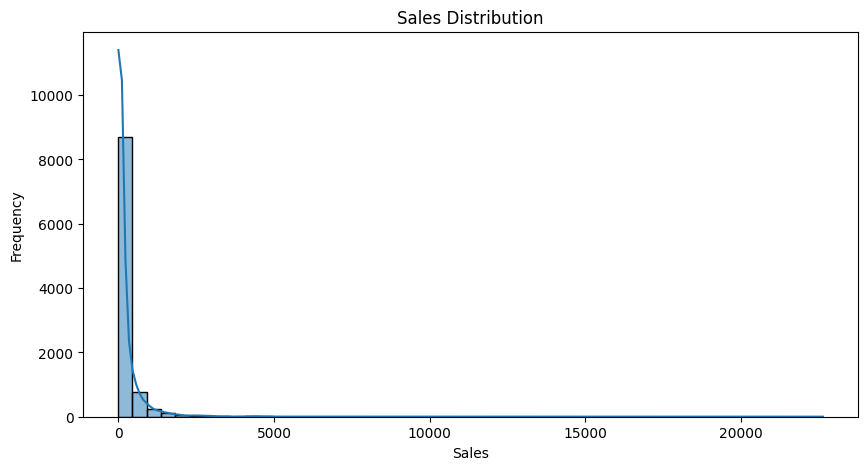

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

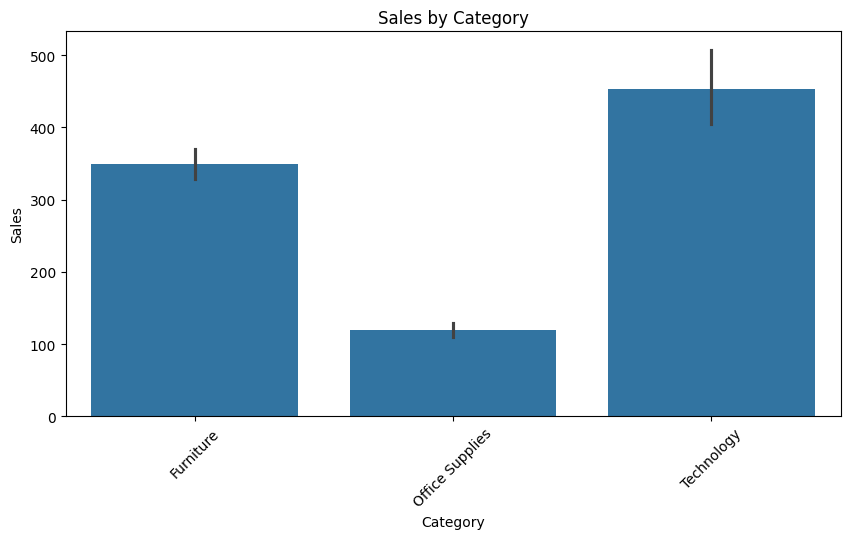

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xticks(rotation=45)
plt.show()

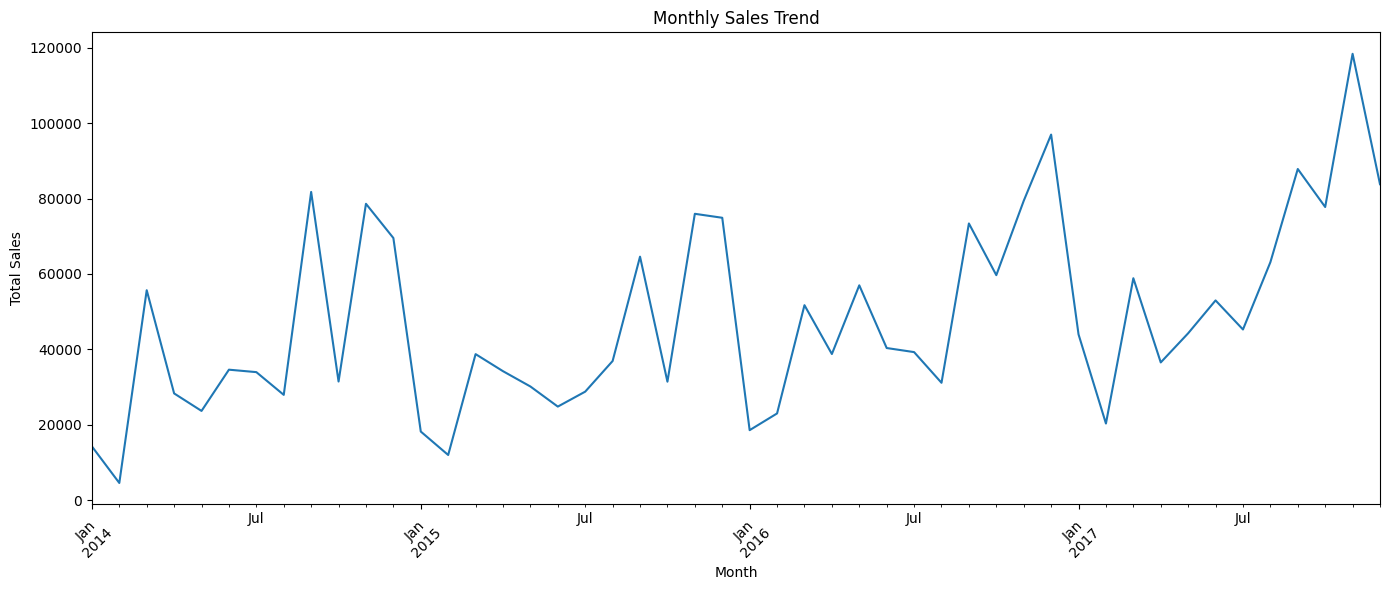

In [16]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()
plt.figure(figsize=(14, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

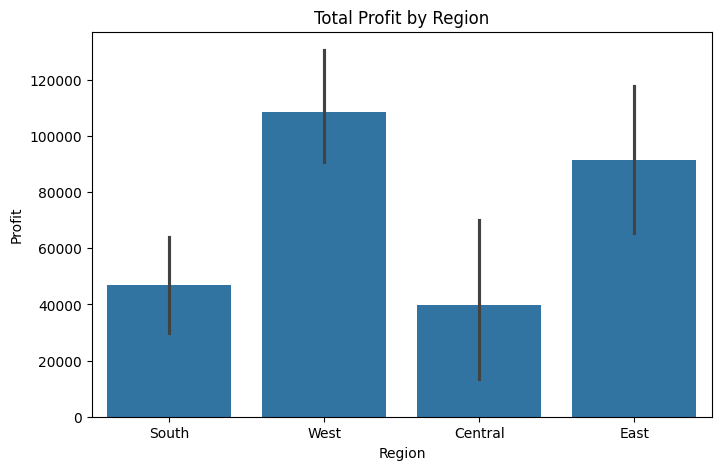

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Region')
plt.ylabel('Profit')
plt.show()


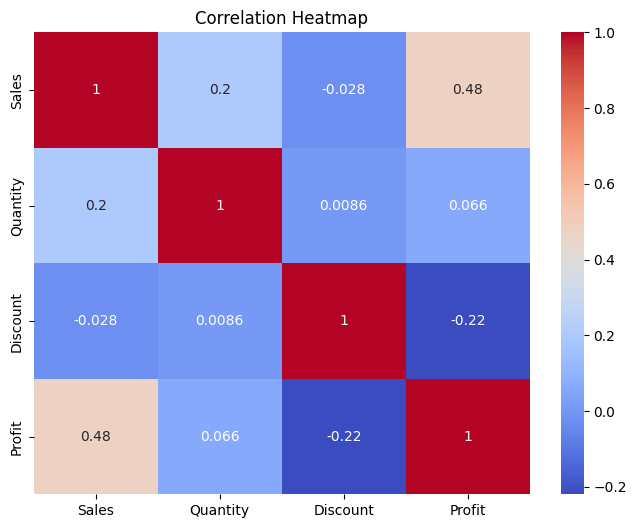

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


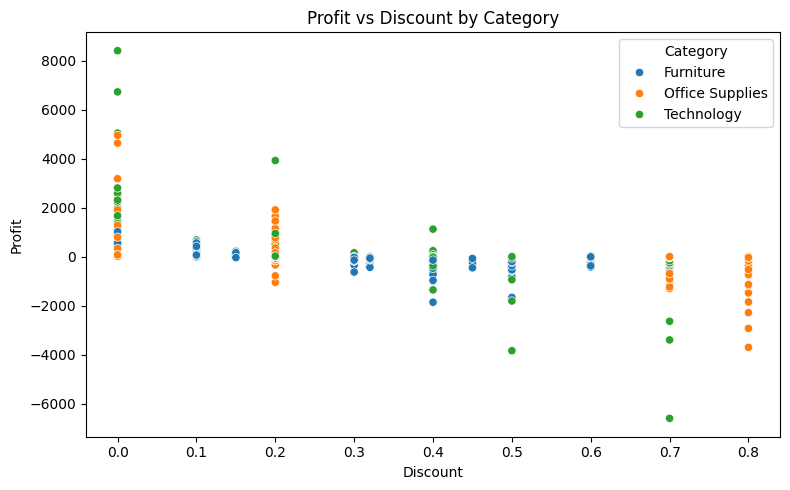

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category")
plt.title("Profit vs Discount by Category")
plt.tight_layout()
plt.show()


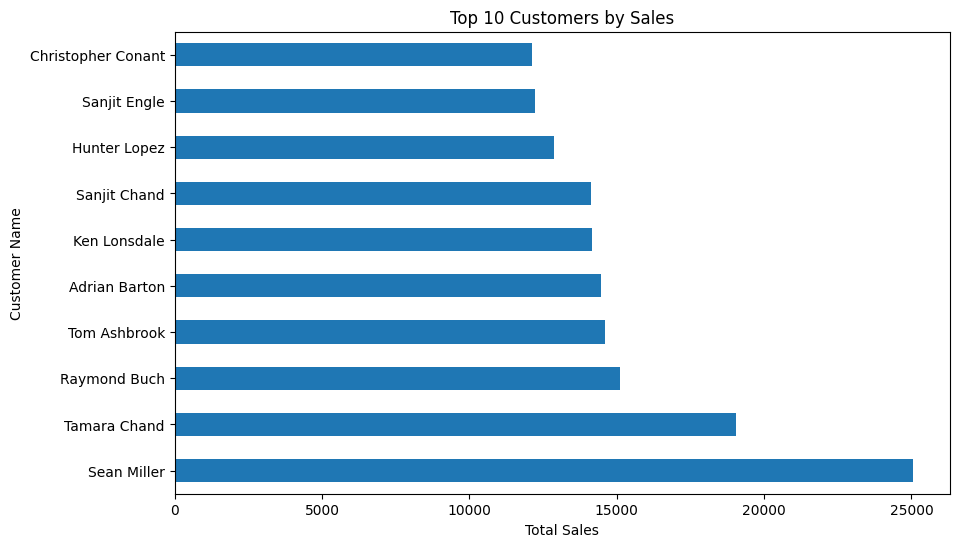

In [20]:
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
top_customers.plot(kind='barh', figsize=(10, 6), title='Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.show()

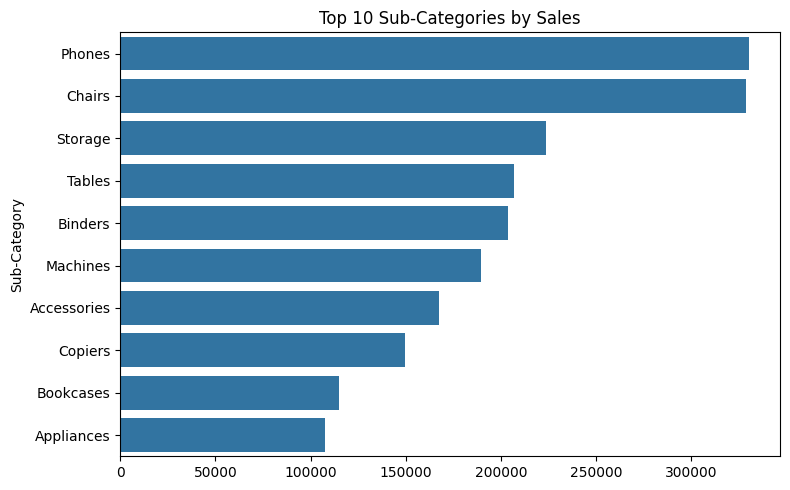

In [21]:
top_subcat = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_subcat.values, y=top_subcat.index)
plt.title("Top 10 Sub-Categories by Sales")
plt.tight_layout()
plt.show()


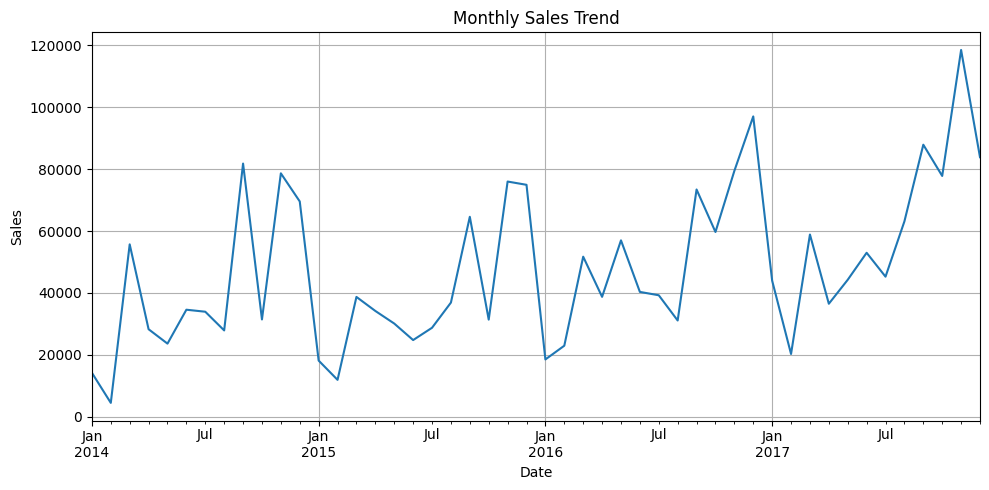

In [22]:
monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


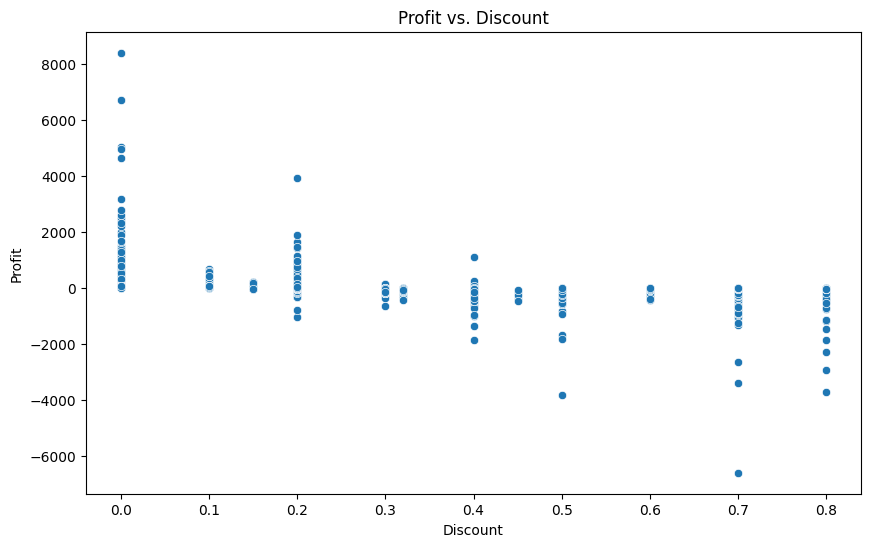

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Profit vs. Discount')
plt.show()

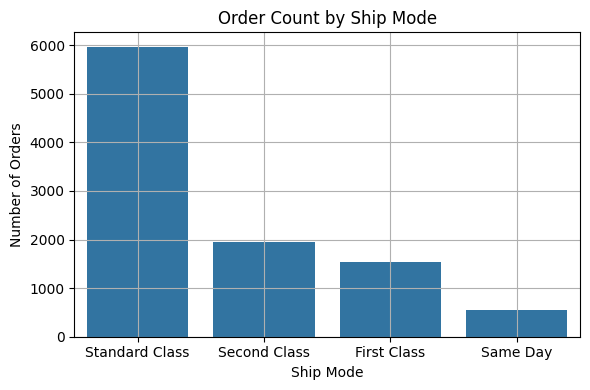

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Ship Mode', order=df['Ship Mode'].value_counts().index)
plt.title("Order Count by Ship Mode")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# import squarify

# region_cat_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
# region_cat_sales['label'] = region_cat_sales['Region'] + '\n' + region_cat_sales['Category']
# region_cat_sales['Sales'] = region_cat_sales['Sales'].astype(float)

# plt.figure(figsize=(10, 6))
# squarify.plot(sizes=region_cat_sales['Sales'],
#               label=region_cat_sales['label'],
#               alpha=0.8)
# plt.title("Treemap of Sales by Region and Category")
# plt.axis('off')
# plt.tight_layout()
# plt.show()


ModuleNotFoundError: No module named 'squarify'

<ipython-input-26-e3ab9ef3ee83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="crest")


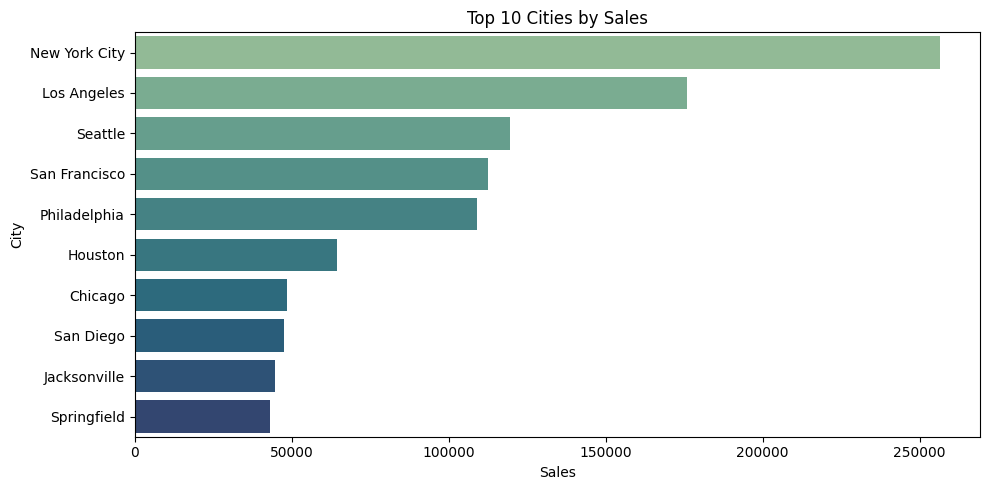

In [26]:
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="crest")
plt.title("Top 10 Cities by Sales")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


In [27]:
from prophet import Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkfzic3pa/qxixcbqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkfzic3pa/fcjmi2as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68812', 'data', 'file=/tmp/tmpkfzic3pa/qxixcbqk.json', 'init=/tmp/tmpkfzic3pa/fcjmi2as.json', 'output', 'file=/tmp/tmpkfzic3pa/prophet_modell22h1rln/prophet_model-20250506014610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:46:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:46:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


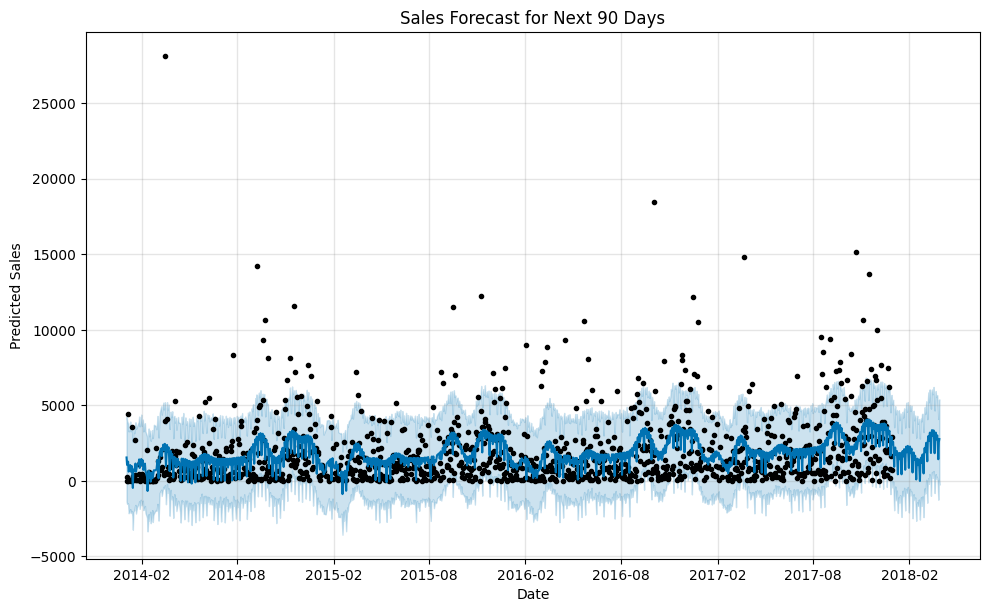

             ds         yhat   yhat_lower   yhat_upper
1317 2018-03-21  1828.490856  -804.959681  4651.687627
1318 2018-03-22  2982.466781    72.569824  5555.810659
1319 2018-03-23  3196.587900   446.658064  5942.432554
1320 2018-03-24  2742.952780   130.829392  5544.526443
1321 2018-03-25  2865.544696   280.812383  5660.036680
1322 2018-03-26  3010.872860   170.048895  5668.769038
1323 2018-03-27  2362.910067  -257.419711  4911.406585
1324 2018-03-28  1429.819906 -1245.328588  4095.049285
1325 2018-03-29  2562.436196    63.547623  5356.227826
1326 2018-03-30  2764.223004  -257.946856  5392.090268


In [42]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

# Train Prophet model
model = Prophet()
model.fit(daily_sales)

# Forecast 90 future days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Sales Forecast for Next 90 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.show()

# Show last few forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

In [43]:
# Step 1: Aggregate actual sales monthly
monthly_actual = df.resample('M', on='Order Date')['Sales'].sum()
test_actual = monthly_actual[-6:]

# Step 2: Reset and check forecast DataFrame
forecast_df = forecast[['ds', 'yhat']].copy()  # make sure 'ds' and 'yhat' exist
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])  # ensure datetime format
forecast_df.set_index('ds', inplace=True)

# Step 3: Aggregate Prophet forecast monthly
monthly_pred = forecast_df['yhat'].resample('M').sum()
test_pred = monthly_pred[-6:]

# Step 4: Calculate metrics
rmse = np.sqrt(mean_squared_error(test_actual, test_pred))
mae = mean_absolute_error(test_actual, test_pred)
mape = np.mean(np.abs((test_actual - test_pred) / test_actual)) * 100

# Step 5: Print results
print("\n🔹 Prophet Forecast Evaluation (Last 6 Months):")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")



🔹 Prophet Forecast Evaluation (Last 6 Months):
RMSE : 39346.03
MAE  : 30067.75
MAPE : 13.87%


<ipython-input-43-74c819d66df3>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_actual = df.resample('M', on='Order Date')['Sales'].sum()
<ipython-input-43-74c819d66df3>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pred = forecast_df['yhat'].resample('M').sum()


In [46]:
print(monthly_actual[-6:].mean())


79384.33716666668


In [44]:
from statsmodels.tsa.arima.model import ARIMA

<ipython-input-45-c7260a56591c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


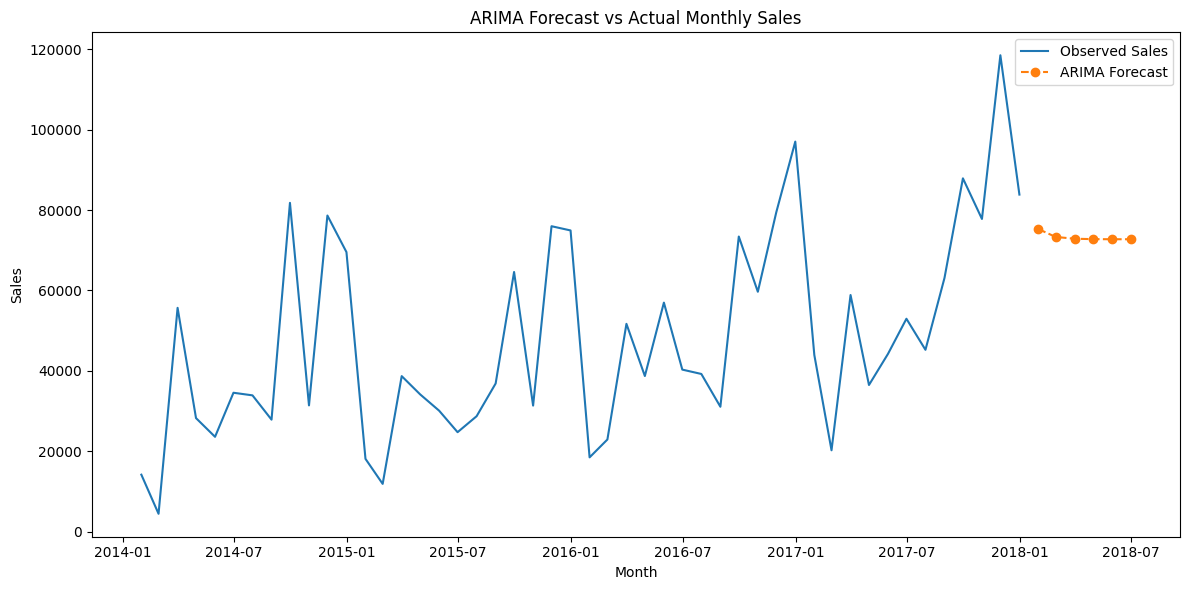

Forecasted Monthly Sales:
2018-01-31    75259.028220
2018-02-28    73306.800169
2018-03-31    72862.101786
2018-04-30    72760.803860
2018-05-31    72737.729188
2018-06-30    72732.473004
Freq: ME, Name: predicted_mean, dtype: float64

🔹 ARIMA Forecast Evaluation (Last 6 Months):
RMSE : 37548.42
MAE  : 31473.12
MAPE : 35.31%


In [45]:
# Aggregate sales monthly
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Fit ARIMA(1,1,1) model
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Observed Sales')
plt.plot(forecast.index, forecast.values, label='ARIMA Forecast', linestyle='--', marker='o')
plt.title('ARIMA Forecast vs Actual Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Show forecasted values
print("Forecasted Monthly Sales:")
print(forecast)

# Step 1: Split into train/test (last 6 months = test)
train = monthly_sales[:-6]
test = monthly_sales[-6:]

# Step 2: Fit ARIMA on training data
model_eval = ARIMA(train, order=(1, 1, 1)).fit()

# Step 3: Forecast 6 months ahead
forecast_eval = model_eval.forecast(steps=6)

# Step 4: Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test, forecast_eval))
mae = mean_absolute_error(test, forecast_eval)
mape = np.mean(np.abs((test - forecast_eval) / test)) * 100

# Step 5: Print results
print("\n🔹 ARIMA Forecast Evaluation (Last 6 Months):")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=910bc6c26f5bf1d016af33f01a6874a948a352d411d132b641237f98569a4f27
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
# Create profiling report
profile = ProfileReport(df, title="📊 Superstore Data Profiling Report", explorative=True)

# Save to HTML file
profile.to_file("superstore_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:01<00:00, 19.57it/s]
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 6 6 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]